<a href="https://colab.research.google.com/github/nureeee/DeepLearning/blob/main/%EC%B6%9C%EB%A0%A5%EC%B8%B5_%EC%84%A4%EA%B3%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망의 사용처
* 신경망은 분류, 회귀 모두 사용함
  * 출력층의 **활성화 함수**에 따라서 목적(사용처)이 달라진다. ( 분류를 할지, 회귀를 할지 )
  * 회귀에서는 항등 함수를 사용하면 회귀가 된다.
* 소프트맥스나 시그모이드 함수를 활용하면 분류
  * 시그모이드는 사용처가 정해져 있음
    * 결괏값을 **확률**로 표현하고 싶을 때 사용한다.
    * 예를 들면 89.12% 확률로 부정적인 리뷰 입니다.
  * 소프트맥스 함수를 주로 분류용 활성화 함수로 사용한다. 

# 소프트맥스 함수 구현하기
$$
y_k = \frac{e^{z_k}}{\sum_{i=0}^{n-1} e^{z_i}}
$$

* $k$ : $k$번째 출력 ( 클래스 번호 ) 0, 1, 2 ....
* $z$ : 출력층에 있는 뉴런의 $WX+b$ 연산
* $n$ : 전체 클래스의 개수

In [ ]:
import numpy as np
# 제일 마지막 출력층에 의한 결과물
z = np.array([0.3, 2.2, 4.3]) # [첫번째 뉴런의 wx +b, 두번째 뉴런의 wx+b, 세번째 뉴런의 ...]

# 분자 부분 계산하기
exp_z = np.exp(z) # > e의 0.3승, e의 2.2승, e의 4.3승

# 분모 부분 계산
sum_exp_z = np.sum(exp_z)

# 소프트맥스를 적용한 최종 예측값
y = exp_z / sum_exp_z
print('소프트맥스의 결과 ; {}'.format(y))

소프트맥스의 결과 ; [0.01605548 0.10734522 0.8765993 ]


In [ ]:
print('소프트맥스의 결과물의 총합 : {}'.format(np.sum(y)))
# 총합이 1인 것은 확률로 설명이 가능하다는 의미이다.

소프트맥스의 결과물의 총합 : 1.0


### 소프트맥스 함수는 단조함수이다.
```python
Z = [3.1, 18.3, 10.3]
Z[0] < Z[2] < Z[1] 일 때

y = softmax(Z)
y[0] < y[2] < y[1] 순서가 유지 된다.

소프트맥스 함수를 지나도 부등호의 순서가 그대로 유지되는 것
이러한 특징을 단조함수의 특징이라고 한다.
```

In [ ]:
def softmax(z):
    exp_z = np.exp(z)
    sum_exp_z = np.sum(exp_z)
    y = exp_z / sum_exp_z

    return y

In [ ]:
softmax(z)

array([0.01605548, 0.10734522, 0.8765993 ])

## 소프트맥스 함수 튜닝
* 소프트맥스 함수는 자연상수 e의 지수 함수
* 입력값이 조금만 커져도 굉장히 큰 값을 연산한다.

In [ ]:
big_z = [1000, 900, 1100]
softmax(big_z) # 컴퓨터의 계산 범위를 넘겨서 난값으로 처리

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


array([nan, nan, nan])

수학적인 기교로 튜닝이 가능하다

$$
y_k = \frac{exp(a_k)}{\sum_{i=1}^n exp(a_i)} = \frac{C\,exp(a_k)}{C\,\sum_{i=1}^n exp(a_i)} = \frac{exp(a_k+logC)}{\sum_{i=1}^n exp(a_i+logC)} = \frac{exp(a_k+C^\prime)}{\sum_{i=1}^n exp(a_i+C^\prime)} 
$$

In [ ]:
c = np.max(big_z)
print(big_z - c)

[-100 -200    0]


In [ ]:
# 튜닝된 소프트맥스
def softmax(z):
    c = np.max(z)

    exp_z = np.exp(z-c)
    sum_exp_z = np.sum(exp_z)
    y = exp_z / sum_exp_z
    return y

# 출력층의 뉴런 수 정하기
* 출력층의 뉴런 개수는 **분류하고 싶은 클래스의 개수대로 설정하면 된다**
 * 

# MNIST 손글씨 데이터셋 분류 출론 모델 만들기

## 텐서플로우 mNIST 데이터 불러오기 형상 다루기

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# mnist 데이터 세트 로딩
from tensorflow.keras import datasets
mnist = datasets.mnist

In [ ]:
# 사이킷런의 train_test_split이 아님!!!!!!!!!!
(X_train, y_train), (X_test, y_test) = mnist.load_data() # 튜플


11493376/11490434 [==============================] - 0s 0us/step


!!!!!!!!!!데이터의  형상부터 확인하자!!!!!!!!!!

In [ ]:
X_train.shape
# 이미지 (개수, h, w) 채널은 1 이라 생략 이것은 흑백을 의미

(60000, 28, 28)

In [ ]:
y_train.shape # 정답이 60000개라는 뜻

(60000,)

첫 번째 이미지 데이터만 가져오기

In [ ]:
image = X_train[0]
image.shape # 0번째를 가져온 것...???

(28, 28)

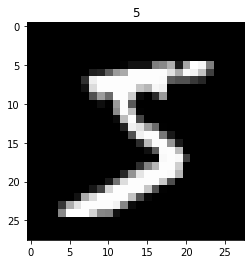

In [ ]:
# matplotlib을 이용해서 이미지 시각화
plt.imshow(image, 'gray') 
plt.title(y_train[0])
plt.show()

데이터를 신경망에 넣을 준비 - 훈련, 데스트 모두 동일한 데이터의 feature의 개수를 가져야 한다.
* 신경망은 평평하게 펴진 1차원 베열을 입력으로 받고 있다.
* 신경망에 집어 넣을 데이터는 1차원 배열로 들어가야 한다.
 * 데이터를 연산하기 위해서 1차원??? 
 

In [ ]:
# 신경망에 들어가는 형태로 배열 편집

# 1. flatten을 활용한 평탄화
image = X_train[0].flatten()
image.shape
# 나중에 사용하려면 앞에 장수가 들어가야되된다.

(784,)

In [ ]:
# 2. ravel을 활용한 평탄화 ( 잘 사용되어지는 방법은 아니당)
# 이유 원본 이미지 데이터를 훼손할 수 있음
image = np.ravel(X_train[0])
image.shape

(784,)

In [ ]:
# 3. reshape을 활용한 평탄화 : 가장 많이 활용
image = X_train[0].reshape(-1)
image.shape

(784,)

In [ ]:
# 텐서플로우나 파이토치 같은 프레임워크에 집어 넣기 위해서 변경하려면...
X_train[0].reshape(1, -1).shape

(1, 784)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train.reshape(60000, -1).shape

(60000, 784)

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 테스트 데이터만 가져오기
def get_test_data():
    _, (X_test, t_test) = mnist.load_data()

    X_test = X_test.reshape(10000, -1) # (N, M) 형태로 바꾸기
    
    return X_test, t_test

def init_network():
    import pickle
    with open('/content/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)

    return network

def predict(network, x):
     
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]

    # 1층 계산 
    Z1 = (x @ W1) + b1
    A1 = sigmoid(Z1)

    # 2층 계산
    Z2 = (A1 @ W2) + b2
    A2 = sigmoid(Z2)

    #3층 계산
    Z3 = (A2 @ W3) + b3
    y = softmax(Z3)

    return y

In [ ]:
X_test.shape

(10000, 28, 28)

 이미지 한장만 예측

In [ ]:
# 테스트 데이터 가지고 오기
x, t = get_test_data()

# 한장만 가져와서 테스트
test_image, test_target = x[0], t[0]


test_image.shape

(784,)

In [69]:
# 네트워크 불러오기
net = init_network()
test_result = predict(net, test_image)

# test_result 에는 소프트맥스의 결과물이 들어있음
# test_result에대한 숫자 10개의 가가의 확룰
print('예측된 softmax 결과 : \n{}'.format(test_result))
print('예측된 label 확인 : {}'.format(np.argmax(test_result)))
print('정답 : {}'.format(test_target))

예측된 softmax 결과 : 
[4.2879005e-06 4.5729317e-07 1.8486280e-04 8.3605024e-05 1.5084674e-07
 6.3182205e-07 4.5782045e-10 9.9919468e-01 3.8066935e-07 5.3083024e-04]
예측된 label 확인 : 7
정답 : 7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


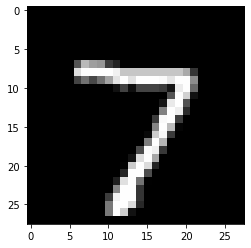

In [ ]:
# test_image 가 7이 맞는지 이미지로 확인
# 이미지로 표시하기 위해 (28, 28)로 변환!

plt.imshow(test_image.reshape(28, 28), 'gray')
plt.show()

# 예측에 대한 정확도 확인
단, 한 장씩 예측해서 정확도 확인하기

In [ ]:
x, t = get_test_data()

net = init_network()
acc_count = 0 # 정답을 맞춘 개수 저장

# X에서 사진을 한 장씩 꺼내서 터스트
for i in range(len(x)):
    pred = predict(net, x[i]) # pred의 shape은 (10,)
    pred = np.argmax(pred) # r결과값의 퍼센트 중 큰것??

    acc_count += (pred == t[i])

print(float(acc_count / len(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


0.9207


# BATCH
쌀포대를 생각해보면... 한 컵씩 나눠서 옯김

In [67]:
# 배치를 이용한 예측
X, t = get_test_data()

net = init_network()

# 배치란/ 데이터의 묶음 
# batch_size : 1 배치당 들어있어야 하는 데이터의 개수

batch_size = 100
acc_count = 0

for i in range(0, len(X), batch_size):
    X_batch = X[i : i + batch_size] # x_batch의 shape : (100, 784)

    pred_batch = predict(net, X_batch)
    pred_batch = np.argmax(pred_batch, axis=1)

    acc_count += np.sum(pred_batch == t[i : i + batch_size])
 
print(float(acc_count / len(X)))

0.9207


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
